In [1]:
from pathlib import Path
ROOT_DIR = str(Path().resolve().parent)

In [2]:
import os
import regex as re
import seaborn as sns
import pandas as pd
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

# Motivation

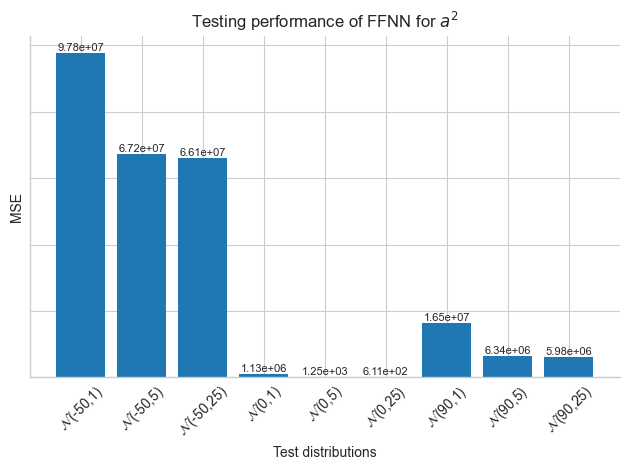

In [57]:
folder_path = os.path.join(ROOT_DIR, r'tb_logs\Polynomials\a2')
model_performance = {}
for path, subdirs, files in os.walk(folder_path):
    for name in files:
        if name.endswith("1"):
            model_name = re.findall(r'\\([A-Z]*[a-z]*)\\version', path)[0]
            eventfile_path = os.path.join(path, name)
            event_acc = EventAccumulator(eventfile_path)
            event_acc.Reload()
            model_performance[model_name] = []
            for tag in event_acc.Tags()['scalars']:
                if "mse" in tag:
                    model_performance[model_name].append(event_acc.Scalars(tag)[-1].value)

data = pd.DataFrame.from_dict(model_performance)[["FFNN"]]
data['mean'] = pd.Series([-50]*3 + [0]*3 + [90]*3)
data['std'] = pd.Series([1, 5 , 25]*3)
fig, ax = plt.subplots()
plt.xticks(rotation=45)
data['dist'] = "$\mathcal{N}$(" + data['mean'].astype(str) + "," + data['std'].astype(str) + ")"
p = ax.bar(data['dist'], data['FFNN'])
rects = ax.patches
labels = data['FFNN'].apply(lambda x: '%.2e' % x).to_list()
ax.bar_label(p, labels, fontsize=8)

ax.tick_params(axis="y", which="both", left=False, labelleft=False)
ax.spines[['right','top']].set_visible(False)
ax.set_ylabel("MSE")
ax.set_xlabel("Test distributions")
ax.set_title("Testing performance of FFNN for $a^2$")
fig.tight_layout()
fig.savefig(os.path.join(ROOT_DIR, "report\\FFNN_a2"), bbox_inches="tight")

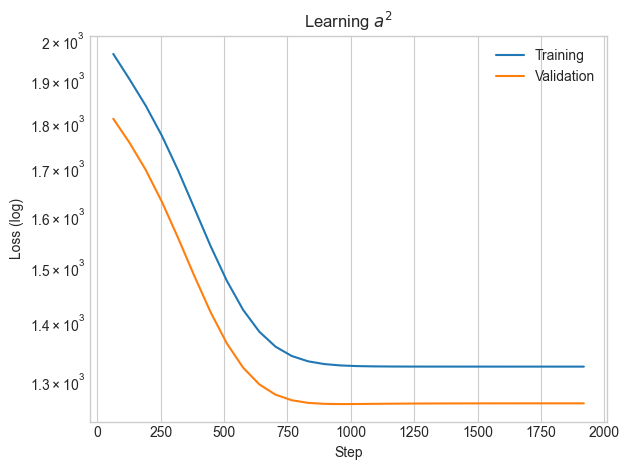

In [4]:
eventfile_path = os.path.join(ROOT_DIR, r'tb_logs\Polynomials\a2\FFNN\version_0\events.out.tfevents.1684230429.JesperPC.7244.0')
event_acc = EventAccumulator(eventfile_path)
event_acc.Reload()
steps = []
train_loss = []
val_loss = []
val_loss_raw = event_acc.Scalars("val_loss")
for i, log in enumerate(event_acc.Scalars("train_loss_epoch")):
    steps.append(log.step)
    train_loss.append(log.value)
    val_loss.append(val_loss_raw[i].value)

fig, ax = plt.subplots()
ax.plot(steps, train_loss, label="Training")
ax.plot(steps, val_loss, label="Validation")
ax.set_yscale("log")
ax.set_ylabel("Loss (log)")
ax.set_xlabel("Step")
ax.set_title("Learning $a^2$")
ax.legend()
fig.tight_layout()
fig.savefig(os.path.join(ROOT_DIR, "report\\FFNN_a2_training"), bbox_inches="tight")

# Arbitrary Polynomials

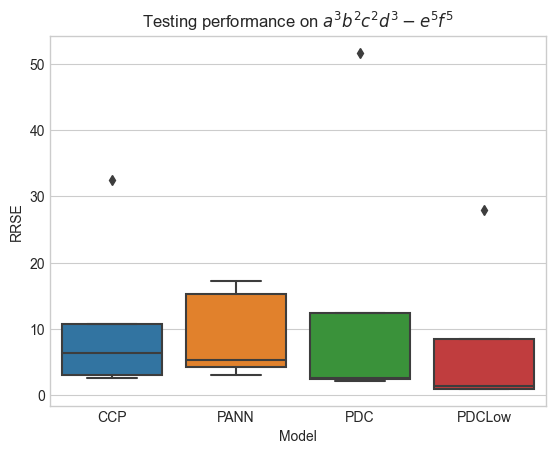

In [65]:
folder_path = os.path.join(ROOT_DIR, r'tb_logs\Polynomials\a3_b2_c2_d3-e5_f5')
model_performance = {}
for path, subdirs, files in os.walk(folder_path):
    for name in files:
        if name.endswith("1"):
            model_name = re.findall(r'\\([A-Z]*[a-z]*)\\version', path)[0]
            eventfile_path = os.path.join(path, name)
            event_acc = EventAccumulator(eventfile_path)
            event_acc.Reload()
            model_performance[model_name] = []
            for tag in event_acc.Tags()['scalars']:
                if "rrse" in tag:
                    model_performance[model_name].append(event_acc.Scalars(tag)[-1].value)

ax = sns.boxplot(data=pd.DataFrame.from_dict(model_performance))
ax.set(xlabel="Model", ylabel="RRSE", title="Testing performance on $a^3 b^2 c^2 d^3 - e^5 f^5$")
fig = ax.get_figure()
fig.savefig(os.path.join(ROOT_DIR, "report\\" + folder_path.split("\\")[-1]), bbox_inches="tight")

# Optimization Functions

In [66]:
import collections
model_performance = collections.defaultdict(dict)
folder_path = os.path.join(ROOT_DIR, r"tb_logs\Optimization")
for path, subdirs, files in os.walk(folder_path):
    for name in files:
        if name.endswith("0"):
            func_name = re.findall(r'\\Optimization\\([A-Za-z]*\d*)', path)[0]
            model_name = re.findall(r'\\([A-Za-z]*)\\version', path)[0]
            eventfile_path = os.path.join(path, name)
            event_acc = EventAccumulator(eventfile_path)
            event_acc.Reload()
            for tag in event_acc.Tags()['scalars']:
                if "val_rrse" in tag:
                        model_performance[func_name][model_name] = event_acc.Scalars(tag)[-1].value

In [67]:
val_data = pd.DataFrame.from_dict(model_performance).T
val_data[['PANN', 'CCP', 'PDCLow', 'PDC']].style.format("{:.2e}")

,PANN,CCP,PDCLow,PDC
Beale,3.81e-02,1.45e-02,5.99e-03,4.54e-03
Bukin06,4.88e-01,4.96e-01,4.89e-01,4.86e-01
CamelThreeHump,3.80e-02,5.32e-03,1.48e-02,7.20e-03
Colville,6.24e-02,2.06e-02,1.47e-02,5.63e-03
Currin,3.15e-06,6.61e-06,3.67e-06,5.35e-07
DettePepelyshev,9.03e-02,1.80e-02,1.09e-01,8.70e-03
GoldsteinPrice,1.20e-01,8.87e-02,1.06e-01,8.60e-02
LimPolynomial,3.19e-02,8.58e-03,8.91e-03,4.59e-03
Price03,1.42e+00,1.42e+00,1.42e+00,1.42e+00


In [69]:
import collections
model_performance = collections.defaultdict(dict)
folder_path = os.path.join(ROOT_DIR, r"tb_logs\Optimization")
for path, subdirs, files in os.walk(folder_path):
    for name in files:
        if name.endswith("1"):
            func_name = re.findall(r'\\Optimization\\([A-Za-z]*\d*)', path)[0]
            model_name = re.findall(r'\\([A-Za-z]*)\\version', path)[0]
            eventfile_path = os.path.join(path, name)
            event_acc = EventAccumulator(eventfile_path)
            event_acc.Reload()
            for tag in event_acc.Tags()['scalars']:
                if "test_rrse" in tag:
                        model_performance[func_name][model_name] = event_acc.Scalars(tag)[-1].value

In [70]:
test_data = pd.DataFrame.from_dict(model_performance).T
test_data[['PANN', 'CCP', 'PDCLow', 'PDC']].style.format("{:.2e}")

,PANN,CCP,PDCLow,PDC
Beale,6.40e-02,7.39e-02,2.31e-02,2.24e-02
Bukin06,6.60e-01,6.60e-01,6.67e-01,6.52e-01
CamelThreeHump,1.68e-01,4.05e-02,1.26e-01,5.51e-02
Colville,2.13e-01,1.14e-01,3.55e-02,1.98e-02
Currin,4.52e-06,1.06e-05,4.25e-06,4.11e-07
DettePepelyshev,2.08e-01,4.04e-02,4.12e-01,3.11e-02
GoldsteinPrice,1.02e-01,1.50e-01,1.34e-01,1.07e-01
LimPolynomial,3.29e-02,1.76e-02,1.82e-02,9.47e-03
Price03,1.12e+01,1.11e+01,1.11e+01,1.11e+01


# Epidemiology

In [71]:
seq_len = [2, 6, 12, 24, 30, 40, 60, 120]
model_performance = {}
for length in seq_len:
    folder_path = os.path.join(ROOT_DIR, r'tb_logs\Epidemiology\\' + str(length) + "len_1lag")
    model_performance[length] = {}
    for path, subdirs, files in os.walk(folder_path):
        for name in files:
            if name.endswith("0"):
                model_name = re.findall(r'\\([a-zA-z]*)\\version', path)[0]
                eventfile_path = os.path.join(path, name)
                event_acc = EventAccumulator(eventfile_path)
                event_acc.Reload()
                
                metric_value = 0
                metric_count = 0
                for tag in event_acc.Tags()['scalars']:
                    if "val_rrse" in tag:
                        metric_value += event_acc.Scalars(tag)[-1].value
                        metric_count += 1
                model_performance[length][model_name] = metric_value / metric_count

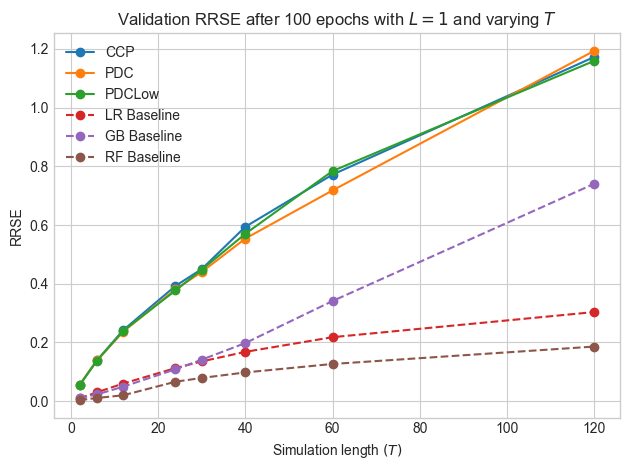

In [72]:
df_models = pd.DataFrame.from_dict(model_performance).T
df_models.rename({"GradientBoostingRegressor": "GB Baseline", 
                  "LinearRegression": "LR Baseline", 
                  "RandomForestRegressor": "RF Baseline"}, axis=1, inplace=True)
df_mnn = df_models[["CCP", "PDC", "PDCLow"]]
df_baselines = df_models[["LR Baseline", "GB Baseline", "RF Baseline"]]
fig, ax = plt.subplots()
df_mnn.plot(style="-o", ax=ax)
df_baselines.plot(marker="o", linestyle="dashed", ax=ax)
ax.legend()
ax.set_title("Validation RRSE after 100 epochs with $L=1$ and varying $T$")
ax.set_xlabel(r"Simulation length $(T)$")
ax.set_ylabel("RRSE")
fig.tight_layout()
fig.savefig(os.path.join(ROOT_DIR, "report/sir_simulation/val_results_fixed_l.png"), bbox_inches="tight")

In [73]:
seq_len = [2, 6, 12, 24, 30, 40, 60, 120]
model_performance = {}
for length in seq_len:
    folder_path = os.path.join(ROOT_DIR, r'tb_logs\Epidemiology\\' + str(length) + "len_1lag")
    model_performance[length] = {}
    for path, subdirs, files in os.walk(folder_path):
        for name in files:
            if name.endswith("1"):
                model_name = re.findall(r'\\([a-zA-z]*)\\version', path)[0]
                eventfile_path = os.path.join(path, name)
                event_acc = EventAccumulator(eventfile_path)
                event_acc.Reload()
            elif name.endswith("0"):
                model_name = re.findall(r'\\([a-zA-z]*)\\version', path)[0]
                if model_name in ("LinearRegression", "GradientBoostingRegressor", "RandomForestRegressor"):
                    eventfile_path = os.path.join(path, name)
                    event_acc = EventAccumulator(eventfile_path)
                    event_acc.Reload()
                else:
                    continue
            metric_value = 0
            metric_count = 0
            for tag in event_acc.Tags()['scalars']:
                if "test_rrse" in tag:
                    metric_value += event_acc.Scalars(tag)[-1].value
                    metric_count += 1
            model_performance[length][model_name] = metric_value / metric_count

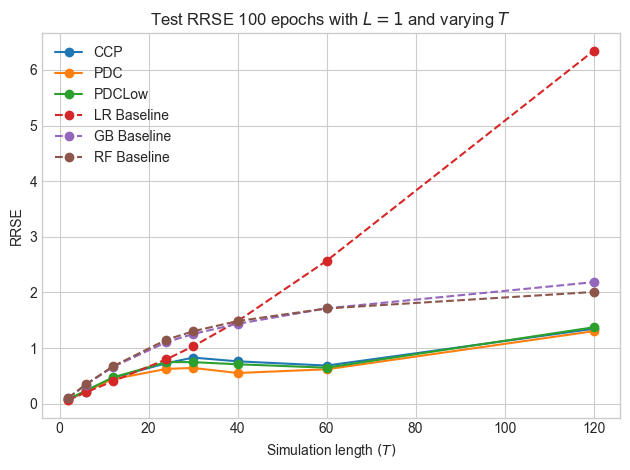

In [74]:
df_models = pd.DataFrame.from_dict(model_performance).T
df_models.rename({"GradientBoostingRegressor": "GB Baseline", 
                  "LinearRegression": "LR Baseline", 
                  "RandomForestRegressor": "RF Baseline"}, axis=1, inplace=True)
df_mnn = df_models[["CCP", "PDC", "PDCLow"]]
df_baselines = df_models[["LR Baseline", "GB Baseline", "RF Baseline"]]
fig, ax = plt.subplots()
df_mnn.plot(style="-o", ax=ax)
df_baselines.plot(marker="o", linestyle="dashed", ax=ax)
ax.legend()
ax.set_title("Test RRSE 100 epochs with $L=1$ and varying $T$")
ax.set_xlabel(r"Simulation length $(T)$")
ax.set_ylabel("RRSE")
fig.tight_layout()
fig.savefig(os.path.join(ROOT_DIR, "report/sir_simulation/test_results_fixed_l.png"), bbox_inches="tight")

In [91]:
lag_size = [1, 2, 3, 4, 5]
model_performance = {}
for lag in lag_size:
    folder_path = os.path.join(ROOT_DIR, r'tb_logs\Epidemiology\\120len_' +  str(lag) + "lag")
    model_performance[lag] = {}
    for path, subdirs, files in os.walk(folder_path):
        for name in files:
            if name.endswith("0"):
                model_name = re.findall(r'\\([a-zA-z]*)\\version', path)[0]
                eventfile_path = os.path.join(path, name)
                event_acc = EventAccumulator(eventfile_path)
                event_acc.Reload()
                
                metric_value = 0
                metric_count = 0
                for tag in event_acc.Tags()['scalars']:
                    if "val_rrse" in tag:
                        metric_value += event_acc.Scalars(tag)[-1].value
                        metric_count += 1
                model_performance[lag][model_name] = metric_value / metric_count

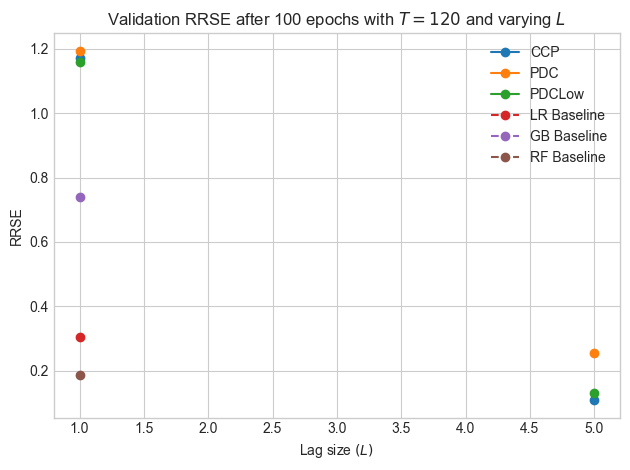

In [95]:
df_models = pd.DataFrame.from_dict(model_performance).T
df_models.rename({"GradientBoostingRegressor": "GB Baseline", 
                  "LinearRegression": "LR Baseline", 
                  "RandomForestRegressor": "RF Baseline"}, axis=1, inplace=True)
df_mnn = df_models[["CCP", "PDC", "PDCLow"]]
df_baselines = df_models[["LR Baseline", "GB Baseline", "RF Baseline"]]
fig, ax = plt.subplots()
df_mnn.plot(style="-o", ax=ax)
df_baselines.plot(marker="o", linestyle="dashed", ax=ax)
ax.legend()
ax.set_title("Validation RRSE after 100 epochs with $T=120$ and varying $L$")
ax.set_xlabel(r"Lag size $(L)$")
ax.set_ylabel("RRSE")
fig.tight_layout()
fig.savefig(os.path.join(ROOT_DIR, "report/sir_simulation/val_results_fixed_t.png"), bbox_inches="tight")

In [111]:
lag_size = [1, 2, 3, 4, 5]
model_performance = {}
for lag in lag_size:
    folder_path = os.path.join(ROOT_DIR, r'tb_logs\Epidemiology\\120len_' + str(lag) + "lag")
    model_performance[lag] = {}
    for path, subdirs, files in os.walk(folder_path):
        for name in files:
            if name.endswith("1"):
                model_name = re.findall(r'\\([a-zA-z]*)\\version', path)[0]
                eventfile_path = os.path.join(path, name)
                event_acc = EventAccumulator(eventfile_path)
                event_acc.Reload()
            elif name.endswith("0"):
                model_name = re.findall(r'\\([a-zA-z]*)\\version', path)[0]
                if model_name in ("LinearRegression", "GradientBoostingRegressor", "RandomForestRegressor"):
                    eventfile_path = os.path.join(path, name)
                    event_acc = EventAccumulator(eventfile_path)
                    event_acc.Reload()
                else:
                    continue
            metric_value = 0
            metric_count = 0
            for tag in event_acc.Tags()['scalars']:
                if "test_rrse" in tag:
                    metric_value += event_acc.Scalars(tag)[-1].value
                    metric_count += 1
            model_performance[lag][model_name] = metric_value / metric_count

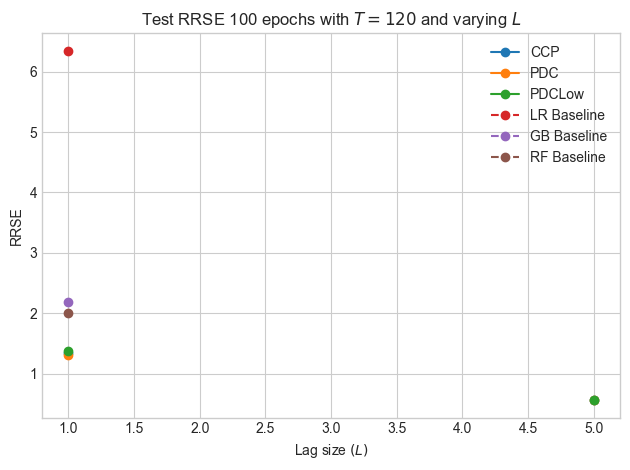

In [112]:
df_models = pd.DataFrame.from_dict(model_performance).T
df_models.rename({"GradientBoostingRegressor": "GB Baseline", 
                  "LinearRegression": "LR Baseline", 
                  "RandomForestRegressor": "RF Baseline"}, axis=1, inplace=True)
df_mnn = df_models[["CCP", "PDC", "PDCLow"]]
df_baselines = df_models[["LR Baseline", "GB Baseline", "RF Baseline"]]
fig, ax = plt.subplots()
df_mnn.plot(style="-o", ax=ax)
df_baselines.plot(marker="o", linestyle="dashed", ax=ax)
ax.legend()
ax.set_title("Test RRSE 100 epochs with $T=120$ and varying $L$")
ax.set_xlabel(r"Lag size $(L)$")
ax.set_ylabel("RRSE")
fig.tight_layout()
fig.savefig(os.path.join(ROOT_DIR, "report/sir_simulation/test_results_fixed_t.png"), bbox_inches="tight")

In [33]:
def test_seq_len_number(number):
    if (number%1 == 0) and (number%2 == 0) and (number%3==0) and (number%4==0) and (number%5==0):
        return True
    else:
        return False

In [32]:
[i for i in range(2, 150) if test_seq_len_number(i)]

[12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144]

In [34]:
[i for i in range(2, 150) if test_seq_len_number(i)]

[60, 120]